In [1]:
from my_gan import main

In [2]:
main()

Epoch 0: loss_g = 0.6763017177581787, loss_d_real = 0.625145673751831, loss_d_fake = 0.714434027671814
Epoch 0: loss_g = 7.148286819458008, loss_d_real = 0.028843384236097336, loss_d_fake = 0.027150239795446396
Epoch 1: loss_g = 5.144092559814453, loss_d_real = 0.1956774890422821, loss_d_fake = 0.10656717419624329
Epoch 1: loss_g = 4.105547904968262, loss_d_real = 0.06068161875009537, loss_d_fake = 0.07764022052288055
Epoch 2: loss_g = 4.851585388183594, loss_d_real = 0.11356160789728165, loss_d_fake = 0.0670197457075119
Epoch 2: loss_g = 6.690634727478027, loss_d_real = 0.017871666699647903, loss_d_fake = 0.08040416985750198
Epoch 3: loss_g = 8.181109428405762, loss_d_real = 0.043389275670051575, loss_d_fake = 0.3509032130241394
Epoch 3: loss_g = 7.063567161560059, loss_d_real = 0.09417060762643814, loss_d_fake = 0.02607407048344612
Epoch 4: loss_g = 3.0926969051361084, loss_d_real = 0.17555536329746246, loss_d_fake = 0.054588839411735535
Epoch 4: loss_g = 5.395907402038574, loss_d_re

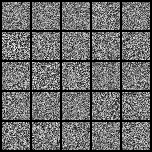

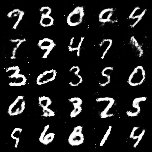

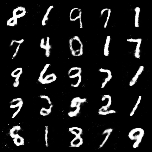

In [6]:
from PIL import Image
display(Image.open("images/0.png"))
display(Image.open("images/90000.png"))
display(Image.open("images/182500.png"))

In [4]:
from my_gan import *
generator = Generator()
generator.load_state_dict(torch.load('mnist_generator.pt'))

<All keys matched successfully>

In [ ]:
import torch
from pylab import *
device = torch.device('cuda')
generator = generator.to(device)
z = torch.randn(64, 100).to(device)
gen_imgs = generator(z)
gen_imgs = gen_imgs.view(64, 1, 28, 28)
save_image(gen_imgs[:25],
   'inter.png',
   nrow=5, normalize=True)
display(Image.open("inter.png"))

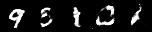

In [65]:
gen_imgs = generator(z[:5])
gen_imgs = gen_imgs.view(5, 1, 28, 28)
save_image(gen_imgs[:5],
   'inter.png',
   nrow=5, normalize=True)
display(Image.open("inter.png"))

In [28]:
save_image(gen_imgs[1],
   'digit_3.png',
   nrow=5, normalize=True)
save_image(gen_imgs[11],
   'digit_5.png',
   nrow=5, normalize=True)
digit_3 = z[1]
digit_5 = z[11]
display(Image.open("digit_3.png"))
display(Image.open("digit_5.png"))

In [45]:
percent = np.linspace(0, 1, 9)
z_inters = torch.zeros(9, 100).to(device)
for idx, per in enumerate(percent):
    z_inter = (1.0 - per) * digit_3 + per * digit_5
    z_inter = z_inter.view(1, 100)
    z_inters[idx: idx+1] += z_inter


In [63]:
digit_3

tensor([ 8.5960e-01, -3.3343e-01,  6.3397e-01,  1.2058e-01, -9.8556e-01,
         6.8328e-01, -9.7675e-01,  8.1684e-01,  5.7665e-01,  1.8595e+00,
         3.5768e-02, -9.1290e-01,  1.0229e-01,  3.3740e-01,  3.4315e-01,
         6.4042e-01, -1.2355e+00, -4.8295e-01, -5.5536e-01,  1.3846e-01,
        -8.0635e-01, -1.3247e+00, -7.4534e-01, -1.6139e+00, -4.0565e-01,
         2.1969e+00,  9.3740e-01, -3.1283e-01,  2.0260e+00, -9.2484e-01,
        -8.2265e-01,  3.3775e-01, -8.2008e-01,  4.6026e-01,  4.8734e-01,
        -3.4473e-01, -8.3507e-02, -6.0209e-01, -1.0137e+00,  4.0640e-01,
        -1.5267e+00, -5.4933e-01,  5.5898e-01, -1.6622e-03,  9.6597e-01,
         9.4149e-02, -1.1953e+00,  9.3060e-01, -6.1769e-01,  7.9304e-01,
         4.3376e-01, -1.7761e+00,  5.1614e-01, -6.1136e-01, -6.2075e-01,
        -1.1059e+00,  5.3439e-01,  2.2267e+00, -7.3103e-01, -2.8545e-01,
        -2.1489e-01, -2.1272e-01,  1.1716e+00,  2.7333e-02,  3.9744e-01,
        -4.5792e-02,  2.5870e-01, -1.9601e+00,  1.1

In [ ]:
imgs = generator(z_inters).cpu().data


for i in range(9):
    plt.imshow(imgs[i].reshape((28,28)), cmap='Greys_r')
    plt.show()